In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [16]:
# EDA
df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


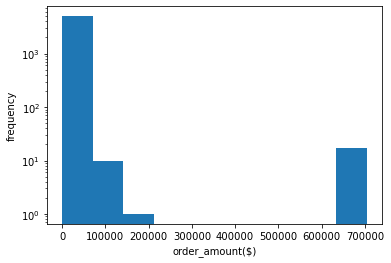

In [84]:
# EDA
new = df['order_amount'].value_counts(ascending=True).reset_index()
# print(list(new['index'])) #list of ascending most popular purchase values
# print(df[df['order_amount'] == 704000].head())
revenue = sum(df['order_amount'])
num_orders = df.shape[0]
lst = list(new['index'])
plt.hist(df['order_amount'], log=True);
plt.xlabel('order_amount($)');
plt.ylabel('frequency');
# we can see how AOV is skewed based on this histogram and why we should consider 
# another metric

In [72]:
# a
# AOV - revenue / # of orders

print("our AOV: "+str(revenue / num_orders))
# there's outliers in the (order_amount) field that's causing the AOV to be 
# a huge overestimate
# i don't think AOV's a good unit of evalution because there's some very 
# expensive purchases but only for 1 item
# also I think AOV isn't as usefull unless your store has a more compact 
# price range. With the given data, we can see our order total prices are
# everywhere and as a result our AOV is being skewed. 
# research other metrics 
# RPV is not useful because every person listed has a purchase
# use median instead since it takes outliers into account

# b
median = np.median(df['order_amount'])
# the median we calculated should be a better indicator of the price of one purchase 

# c
print("our median: " + str(median))



our AOV: 3145.128
our median: 284.0


# Question 2
# a
select count(*) as count
from Shippers s
join Orders o on s.ShipperID = o.ShipperID
where s.ShipperName = "Speedy Express";
# b
select e.LastName
from Employees e
where e.EmployeeID = (select o.EmployeeID
from Orders o
group by o.EmployeeID
order by count(OrderID)
desc limit 1);
# c 
select p.productName
from products p 
where p.productID = (select productID
from (select *  from customers c join orders o on c.CustomerID == o.CustomerID where Country == "Germany") 
g join orderDetails d on d.OrderID = g.OrderID
group by productID
order by SUM(d.QUANTITY)
desc limit 1)